In [1]:
import pandas as pd 
import numpy as np
import os

from ngboost import NGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
%matplotlib inline

# Reading train and test datasets from given paths

In [2]:
train_path  = r'D:\av_hackathons\machine_hack_5\Train.csv'
test_path   = r'D:\av_hackathons\machine_hack_5\Test.csv'
submis_path = r'D:\av_hackathons\machine_hack_5\Sample_Submission.xlsx'

###### These are the paths of the files in my system. Kindly change them when using

In [3]:
train_data  = pd.read_csv(train_path)
test_data   = pd.read_csv(test_path)
train_y     = train_data['IsUnderRisk'].values

train_data  = train_data.drop(['IsUnderRisk'],axis=1)

print(train_data.shape,test_data.shape)
train       = train_data.values
test        = test_data.values

(543, 7) (233, 7)


## Fitting the model while applying stratified K fold.
Here I have taken the number of steps to be 700 (or the number of decision trees to be 700), just to show the progression of how the loss and validation loss reduces.

In [4]:
### outcome of stratified k fold to be stored here in these 2 arrays
oof_pred               = np.zeros((len(train),2 ))
y_pred                 = []

### Splits made for stratified k fold 
n_splits               = 5
skf                    = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

##########  Performing stratified k fold on the data 
for fold, (tr_ind, val_ind) in enumerate(skf.split(train, train_y)):
    X_train, X_val     = train[tr_ind], train[val_ind]
    y_train, y_val     = train_y[tr_ind], train_y[val_ind]
    model              = NGBClassifier(random_state=42,verbose=True,n_estimators=700)

    model.fit(X        = X_train,
              Y        = y_train,
              X_val    = X_val,
              Y_val    = y_val)


    val_pred           = model.predict_proba(X_val)

    print('validation logloss fold-',fold+1,': ',log_loss(y_val, val_pred))
    print('\n')


    oof_pred[val_ind]  = val_pred


    y_pred.append(model.predict_proba(test))


y_pred_final           = np.mean(np.array(y_pred),axis=0)




[iter 0] loss=0.6607 val_loss=0.6526 scale=2.0000 norm=4.0000
[iter 100] loss=0.2997 val_loss=0.3568 scale=2.0000 norm=2.8774
[iter 200] loss=0.2586 val_loss=0.3313 scale=2.0000 norm=2.8653
[iter 300] loss=0.2495 val_loss=0.3264 scale=1.0000 norm=1.4324
[iter 400] loss=0.2456 val_loss=0.3236 scale=2.0000 norm=2.8600
[iter 500] loss=0.2443 val_loss=0.3230 scale=0.2500 norm=0.3574
[iter 600] loss=0.2437 val_loss=0.3224 scale=1.0000 norm=1.4292
validation logloss fold- 1 :  0.32240919545058566


[iter 0] loss=0.6607 val_loss=0.6508 scale=2.0000 norm=4.0000
[iter 100] loss=0.3144 val_loss=0.2721 scale=2.0000 norm=2.9217
[iter 200] loss=0.2807 val_loss=0.2348 scale=1.0000 norm=1.4514
[iter 300] loss=0.2721 val_loss=0.2257 scale=1.0000 norm=1.4464
[iter 400] loss=0.2682 val_loss=0.2230 scale=0.5000 norm=0.7218
[iter 500] loss=0.2672 val_loss=0.2220 scale=0.1250 norm=0.1804
[iter 600] loss=0.2668 val_loss=0.2217 scale=0.0625 norm=0.0902
validation logloss fold- 2 :  0.2215503873386347


[iter

In [5]:
submission_df = pd.read_excel(submis_path)
submission_df[0] = y_pred_final[:,0]
submission_df[1] =y_pred_final[:,1]

In [6]:
submission_df.head(5)

,0,1
0,0.000121,0.999879
1,0.019659,0.980341
2,0.905660,0.094340
3,0.000121,0.999879
4,0.489699,0.510301


## plotting the loss score(This will belong to the last fold only)

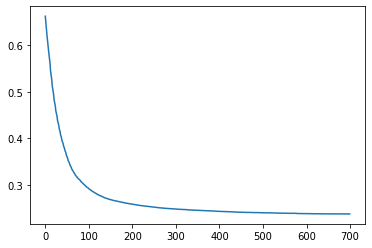

In [7]:
plt.plot(model.evals_result['train']['LOGSCORE']);

## Parameters used in the model

In [8]:
model.get_params()

{'Base__ccp_alpha': 0.0,
 'Base__criterion': 'friedman_mse',
 'Base__max_depth': 3,
 'Base__max_features': None,
 'Base__max_leaf_nodes': None,
 'Base__min_impurity_decrease': 0.0,
 'Base__min_impurity_split': None,
 'Base__min_samples_leaf': 1,
 'Base__min_samples_split': 2,
 'Base__min_weight_fraction_leaf': 0.0,
 'Base__presort': 'deprecated',
 'Base__random_state': None,
 'Base__splitter': 'best',
 'Base': DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'Dist': ngboost.distns.categorical.k_categorical.<locals>.Categorical,
 'Score': ngboost.scores.LogScore,
 'col_sample': 1.0,
 'learning_rate': 0.01,
 'minibatch_frac': 1.0